# ライブラリのインポート

In [1]:
# # 各種ライブラリのインポート
# import pandas as pd
# import pandas_datareader.data as web
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from tqdm import tqdm_notebook as tqdm

# from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
# from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict, GridSearchCV, RandomizedSearchCV, KFold, TimeSeriesSplit
# from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet, BayesianRidge, LinearRegression
# from sklearn.ensemble import RandomForestClassifier, StackingClassifier, VotingClassifier, IsolationForest, RandomForestRegressor, GradientBoostingRegressor
# from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neural_network import MLPClassifier
# from sklearn.svm import SVC, SVR
# from sklearn.multiclass import OneVsRestClassifier, OutputCodeClassifier
# from sklearn.pipeline import Pipeline
# from sklearn.base import BaseEstimator, ClassifierMixin
# from sklearn.metrics import accuracy_score, classification_report, f1_score, make_scorer, mean_absolute_error, roc_auc_score, mean_squared_error
# from sklearn.decomposition import PCA
# from pycaret.classification import *
# from pycaret.regression import *
# from prophet import Prophet

# import statsmodels.api as sm
# import statsmodels.formula.api as smf
# from statsmodels.tsa import stattools
# from statsmodels.tsa.seasonal import seasonal_decompose
# from statsmodels.graphics import tsaplots
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# from statsmodels.tsa.statespace.sarimax import SARIMAX

# from imblearn.over_sampling import SMOTE
# import torch
# from torch import nn

# from scipy.stats import mode

# import sweetviz as sv

# import pickle
# import re
# import os
# import gc

# import holidays

# import time
# from category_encoders import TargetEncoder

# import lightgbm as lgb
# import optuna
# import optuna.integration.lightgbm as lgb_op

# from plotly import tools
# from plotly.graph_objects import Scatter, Figure, Layout
# from plotly.offline import iplot

# import warnings
# # すべての警告メッセージを無視するように設定
# warnings.filterwarnings('ignore')
# # 特定の種類の警告のみを無視することも可能です。例えば、非推奨警告だけを無視する場合は次のように設定できます:
# # warnings.filterwarnings('ignore', category=DeprecationWarning)
# print("ライブラリのインポート完了")

# 仮のライブラリインポート場所

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycaret
import sweetviz as sv
import time

import lightgbm as lgb
import optuna
import optuna.integration.lightgbm as lgb_op

# sklearn
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error

from plotly import tools
from plotly.graph_objects import Scatter, Figure, Layout
from plotly.offline import iplot

import statistics

# 1. データの読み込み

In [8]:
# 各種データの読み込み
train_df = pd.read_csv(r"C:\Users\USER\Desktop\Kaggle\Titanic\venv\train.csv")
test_df = pd.read_csv(r"C:\Users\USER\Desktop\Kaggle\Titanic\venv\test.csv")
# それぞれ表示して確認
display(train_df.head())
display(test_df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 2. Shapeの確認

In [ ]:
# shapeの確認
print("Tr: ", train_df.shape)
print("Te: ", test_df.shape)

Tr:  (891, 12)
Te:  (418, 11)


# 3. EDAの実行

In [ ]:
# EDAの実行
report = sv.compare(train_df, test_df, target_feat="Survived")

# 結果をhtml形式で保存。別途開いて無いよう確認する
# report.show_html("report.html")

                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**reportを確認して分かった事**  
**・Pclass**  
tr, tsどちらも"3"/約50％強, "2", "1"はそれぞれ20-25%ずつ。  
ただ、生存率に関しては、"3"/24%, "2"/47%, "1"/63% となっており、**1番良いクラス(1)の生存率が一番高い**  
**・Sex**  
tr, tsどちらもM:約65%、F:35%だが、**生存率だけ見ると、M:19%, F:74%と女性が高い**  
**・Age**  
この時点では生存率などは分からないので、後でbin分けでカテゴリ化して再度EDAで詳細確認する  
**・SibSp(乗船していた兄弟/配偶者の数)**  
"0"/68%, "1"/23%と全体の90%を占める。生存率は"0"/35%, "1"/54%, "2"/46%, "3"/25%, "4"17%となり、**1~2であれば半分ぐらいは生存している**  
**配偶者(1)は同じ部屋にいるので生存率が高いが、2以上は兄弟等で別部屋に居る人もあり、生存率が純粋に増えるわけではないのか？**  
**・Parch(乗船していた親と子供の数)**  
全体の割合は 0 / 76%, 1 / 13%, 2 / 9%, 以後1%ずつ  
生存率は 0 / 34%, 1 / 55%, 2 / 50%, 3 / 60%　以後0% **SibSpと違って、同じ部屋にいる確率が高いので、数が増えるにつれて生存率が高いのか？**  
**・Embarked**  
S / 72%(65%), C / 19%(24%), Q / 9%(11%) 唯一trとtsデータで割合に差が少しある特徴量  
生存率はC / 55%, Q / 39%, S / 34%  
Pclass = 1 = Cが多いのか？特徴量作成時にうまい事活用できるかも？

**(コメント欄)**

# 4. 欠損値の確認

In [ ]:
# 欠損値の確認
print("Train_df")
print(train_df.isnull().sum())
print("★"*89)
print("Test_df")
print(test_df.isnull().sum())

Train_df
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★
Test_df
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


**(分かった事)**  
train_dfはAge, Cabin, Embarkedが欠損値を含む  
test_dfはAge, Fare, Cabinが欠損値を含む

**(コメント欄)**

# 5. 要約統計量とデータ分布の確認

In [ ]:
# 数値型の詳細も確認しておく
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

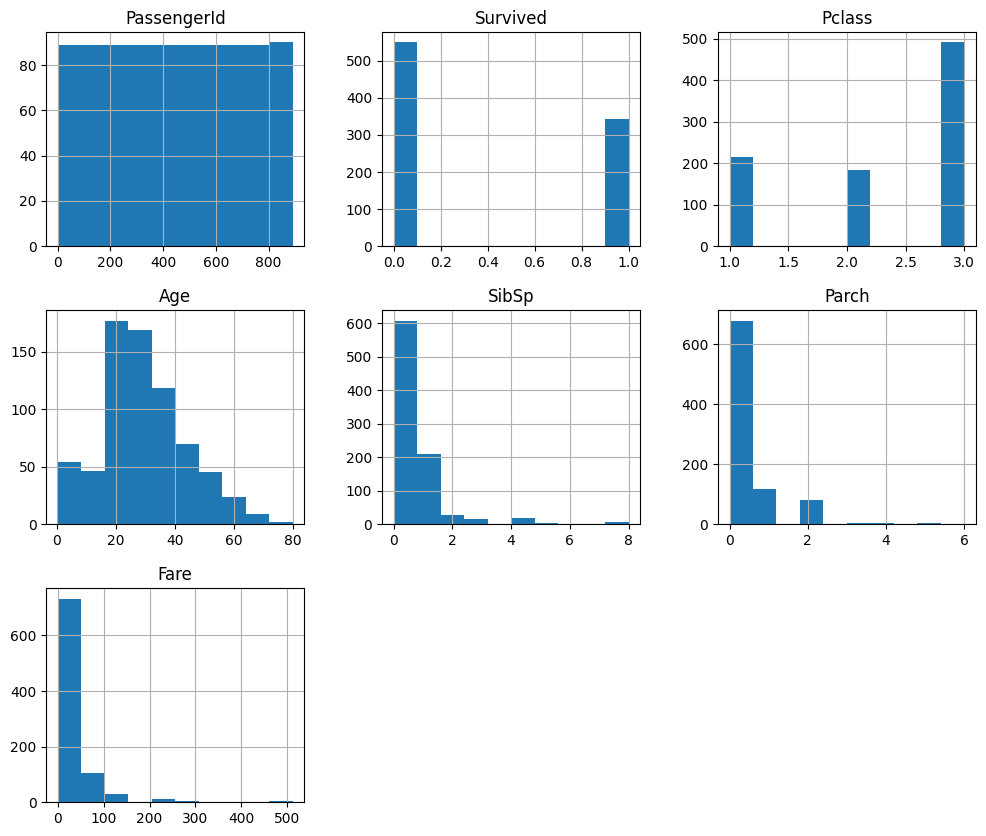

In [ ]:
# データの分布をざっくりと確認
train_df.hist(bins=10, figsize=(12, 10))

**要約統計量とヒストグラムから分かった事**  
report内でも同じ内容は出ていたが、視覚化する事で、  
・  Pclassは"3"が多い  
・  Ageは20~30代が多い  
・  SibSp, Parchは0が多い  
・  Fareも低価格(安い客室)が多い  

**(コメント欄)**

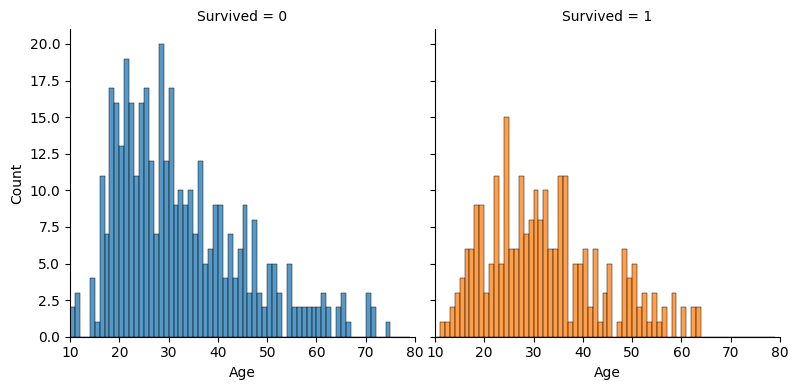

In [ ]:
# Survivedに影響しそうな特徴量の詳細確認
# Age
age_bin_edges = np.arange(10, 80, 1)

# FaceGridを作成
fig = sns.FacetGrid(train_df, col="Survived", hue="Survived", height=4)
fig.map(sns.histplot, "Age", bins=age_bin_edges, kde=False)
plt.xlim(10, 80)
plt.show()

**分かった事**  
65歳以上のお年寄りで生き残っている人はいない(金が無いから悪い客室だった？体力の問題？)  
10~20歳までが良く生き残っている印象(親が助けてあげているからなのでは？)  

**(コメント欄)**

<Axes: xlabel='Pclass'>

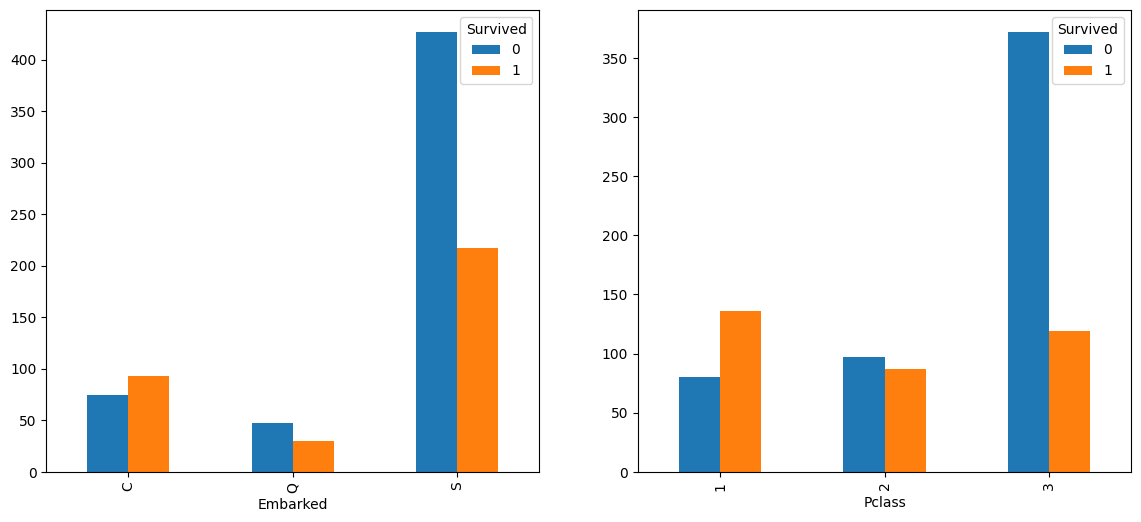

In [ ]:
# サブプロットを作成
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
# 出港地毎の生存者数を可視化
train_df.groupby(["Embarked", "Survived"]).size().unstack().plot(kind="bar", stacked=False, ax=axes[0])
# Pclass毎の生存者数も確認
train_df.groupby(["Pclass", "Survived"]).size().unstack().plot(kind="bar", stacked=False, ax=axes[1])

**分かった事**  
reportの所でも予想をしたが、Cから乗船する人はPclass = 1の人が多いのか？  

**コメント欄**

<Axes: >

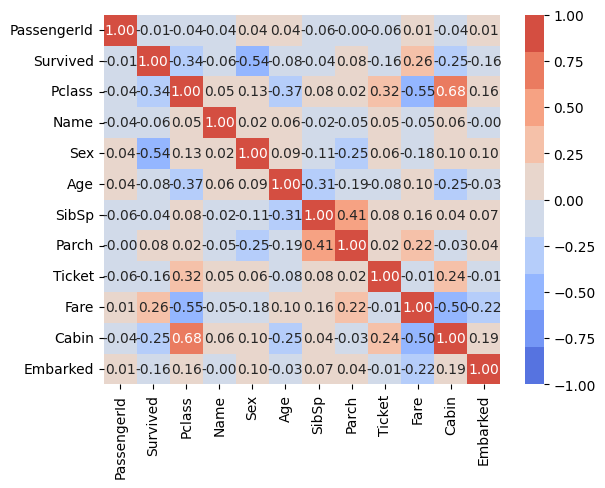

In [ ]:
# 相関をヒートマップで見る(object変数を数値に変更が必須)

# カテゴリ変数をラベルエンコーディング
le = LabelEncoder()
for cat_col in train_df.select_dtypes('object').columns:
    train_df[cat_col] = le.fit_transform(train_df[cat_col])

# ヒートマップを描画
cor = train_df.corr()
sns.heatmap(cor, cmap= sns.color_palette('coolwarm', 10), annot=True,fmt='.2f', vmin = -1, vmax = 1)

**ヒートマップから分かった事**  
意外と相関関係がある特徴量が無いし、Survivedに影響のある特徴量も少ない？  
CabinとPclassの相関関係が高いので、testデータの欠損値補間の際に活用できるかも  

# 6. LightGBMで分析を行う

## 使用するデータセット

In [ ]:
# 各種データの読み込み
train_df = pd.read_csv(r"C:\Users\USER\Desktop\Kaggle\Titanic\train.csv")
test_df = pd.read_csv(r"C:\Users\USER\Desktop\Kaggle\Titanic\test.csv")
# それぞれ表示して確認
# display(train_df.head())
# display(test_df.head())

# train/testデータ間でName列やTicket列の値で一致しないものが多数あり、LabelEncodingがうまくいかないので、一度データを結合してからtrain/testに分ける
# train_df/test_dfを区別するための特徴量作成
train_df["train"] = 1
test_df["train"] = 0
test_df["Survived"] = 0

# train_dfとtest_dfを結合
merged_df = pd.concat([train_df, test_df], axis=0)

# LabelEncoding
for col in merged_df.columns:
    le = LabelEncoder()
    if merged_df[col].dtype == "object":
        merged_df[col] = le.fit_transform(merged_df[col])

# 再度train_df, test_dfに分割
train_df = merged_df[merged_df["train"] == 1].copy()
test_df = merged_df[merged_df["train"] == 0].copy()


# # 学習データ
x_train = train_df.drop(columns=["PassengerId", "Survived", "train"])
y_train = train_df["Survived"]
id_train = train_df[["PassengerId"]]
print("Train_data")
print(train_df.shape, x_train.shape, y_train.shape, id_train.shape)
# テストデータ
x_test = test_df.drop(columns=["PassengerId", "Survived", "train"])
id_test = test_df[["PassengerId"]]
print("Test_df")
print(test_df.shape, x_test.shape, id_test.shape)


# pd.set_option("display.max_rows", None) # 表示行数の制限解除
# pd.reset_option("display.max_rows")  # 再度制限を設ける

Train_data
(891, 13) (891, 10) (891,) (891, 1)
Test_df
(418, 13) (418, 10) (418, 1)


## 分析コード(Kaggle Score : 0.76076)

In [ ]:
# データの分割
x_tr, x_va, y_tr, y_va = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# LightGBM用のデータセットの作成
lgb_train = lgb_op.Dataset(x_tr, label=y_tr)
lgb_test = lgb_op.Dataset(x_va, label=y_va)

# パラメーターの設定
params = {
  'objective':'binary',
  'metric': 'binary_error',
  'force_row_wise' : True,
  'verbose': -1
}

st_time = time.time()

# チューニングの開始
base_tuner = lgb_op.LightGBMTunerCV(params, lgb_train, num_boost_round=700, optuna_seed=123)
base_tuner.run()

print("Best_Score: ", {base_tuner.best_score})
print("Best_Params: ", base_tuner.best_params)

ed_time = time.time()
print("所要時間: ", ed_time - st_time)

[I 2024-07-04 22:54:39,445] A new study created in memory with name: no-name-fa6aea0e-34eb-43c5-a7ca-df4e7f50293d
min_child_samples, val_score: 0.154575: 100%|##########| 5/5 [00:03<00:00,  1.36it/s]

Best_Score:  {0.15457500246232642}
Best_Params:  {'objective': 'binary', 'metric': 'binary_error', 'force_row_wise': True, 'verbose': -1, 'feature_pre_filter': False, 'lambda_l1': 0.0014254158848563, 'lambda_l2': 3.242628589658918e-05, 'num_leaves': 3, 'feature_fraction': 0.42, 'bagging_fraction': 0.8341876123428466, 'bagging_freq': 5, 'min_child_samples': 20}
所要時間:  80.18673181533813


In [ ]:
# ベストパラメーターを変数に格納
best_params = base_tuner.best_params

# ベストパラメーターでLightGBMのモデルを作成&学習
best_model = lgb.LGBMClassifier(**best_params)
best_model.fit(x_tr, y_tr)

# モデルの評価
y_va_pred = best_model.predict(x_va)
print("Accuracy: ", accuracy_score(y_va, y_va_pred))

# 予測データの推論
y_test_pred = best_model.predict(x_test)
y_test_pred

Accuracy:  0.8156424581005587


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
submit_df = pd.DataFrame({
    "PassengerId" : id_test["PassengerId"],
    "Survived" : y_test_pred
})

# submit_df.to_csv("LightGBM_BaseLine.csv", index=False)
## Kaggle Score : 0.76076

<Axes: ylabel='col'>

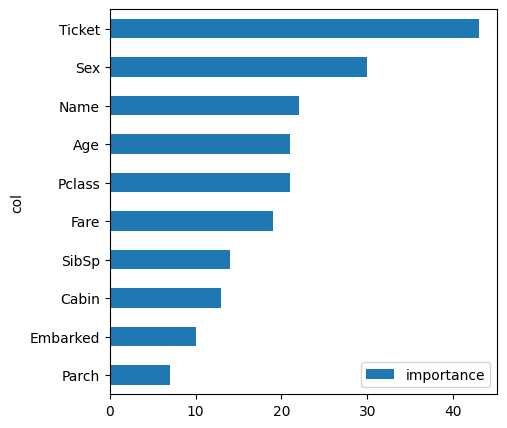

In [ ]:
# 特徴量の重要度を確認
imp = pd.DataFrame({
    "col" : x_train.columns,
    "importance" : best_model.feature_importances_
})

imp = imp.set_index(imp["col"])
imp.sort_values(by="importance", ascending=True).plot(kind="barh", figsize=(5, 5))


# 7. RandomForestで分析

## 使用するデータセット

In [ ]:
# 各種データの読み込み
train_df = pd.read_csv(r"C:\Users\USER\Desktop\Kaggle\Titanic\train.csv")
test_df = pd.read_csv(r"C:\Users\USER\Desktop\Kaggle\Titanic\test.csv")
# それぞれ表示して確認
# display(train_df.head())
# display(test_df.head())

# train/testデータ間でName列やTicket列の値で一致しないものが多数あり、LabelEncodingがうまくいかないので、一度データを結合してからtrain/testに分ける
# train_df/test_dfを区別するための特徴量作成
train_df["train"] = 1
test_df["train"] = 0
test_df["Survived"] = 0

# train_dfとtest_dfを結合
merged_df = pd.concat([train_df, test_df], axis=0)

# LabelEncoding
for col in merged_df.columns:
    le = LabelEncoder()
    if merged_df[col].dtype == "object":
        merged_df[col] = le.fit_transform(merged_df[col])

# 再度train_df, test_dfに分割
train_df = merged_df[merged_df["train"] == 1].copy()
test_df = merged_df[merged_df["train"] == 0].copy()


# # 学習データ
x_train = train_df.drop(columns=["PassengerId", "Survived", "train"])
y_train = train_df["Survived"]
id_train = train_df[["PassengerId"]]
print("Train_data")
print(train_df.shape, x_train.shape, y_train.shape, id_train.shape)
# テストデータ
x_test = test_df.drop(columns=["PassengerId", "Survived", "train"])
id_test = test_df[["PassengerId"]]
print("Test_df")
print(test_df.shape, x_test.shape, id_test.shape)

Train_data
(891, 13) (891, 10) (891,) (891, 1)
Test_df
(418, 13) (418, 10) (418, 1)


## 分析コード

### 普通に分析

TR Accuracy:  0.824438202247191
VA Accuracy:  0.8212290502793296


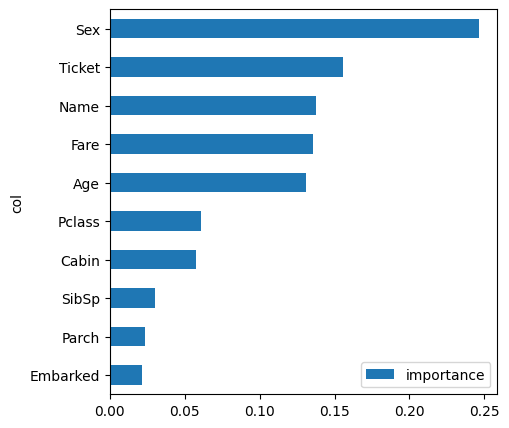

In [ ]:
# RFのインスタンスを作成
model_rf = RandomForestClassifier(random_state=42)

# データの分割
x_tr, x_va, y_tr, y_va = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# クロスバリデーションの設定
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 学習
y_tr_pred = cross_val_predict(model_rf, x_tr, y_tr, cv=cv)

# 学習データの精度評価
print("TR Accuracy: ", accuracy_score(y_tr, y_tr_pred))

# クロスバリデーションとは別に再学習
model_rf.fit(x_tr, y_tr)

# 検証データに対する予測
y_va_pred = model_rf.predict(x_va)

# 検証データの精度評価
print("VA Accuracy: ", accuracy_score(y_va, y_va_pred))

# 特徴量の重要度を確認
imp_rf = pd.DataFrame({
    "col" : x_train.columns,
    "importance" : model_rf.feature_importances_
})

imp_rf = imp_rf.set_index(imp_rf["col"])
imp_rf.sort_values(by="importance", ascending=True).plot(kind="barh", figsize=(5, 5))

# テストデータに対する予測
y_test_pred = model_rf.predict(x_test)
rf_result_df = pd.DataFrame({
    "PassengerId" : id_test["PassengerId"],
    "Survived" : y_test_pred
})



### Optunaでパラメータチューニング(Kaggle Score : 0.77511)

[I 2024-07-04 23:55:51,574] A new study created in memory with name: no-name-d014cb10-7e8b-4193-a5a3-e249abaf20db
[I 2024-07-04 23:55:53,774] Trial 0 finished with value: 0.8204067541271736 and parameters: {'n_estimators': 190, 'max_depth': 19, 'min_samples_split': 5, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.8204067541271736.
[I 2024-07-04 23:55:55,943] Trial 1 finished with value: 0.8226602222082733 and parameters: {'n_estimators': 187, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.8226602222082733.
[I 2024-07-04 23:55:56,800] Trial 2 finished with value: 0.814801330738811 and parameters: {'n_estimators': 74, 'max_depth': 6, 'min_samples_split': 9, 'min_samples_leaf': 9}. Best is trial 1 with value: 0.8226602222082733.
[I 2024-07-04 23:55:58,463] Trial 3 finished with value: 0.8148138848785388 and parameters: {'n_estimators': 156, 'max_depth': 11, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 1 with value:

★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★
Best Score: 0.8462368966166594
Best RF params: {'n_estimators': 138, 'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 1}
TR Accuracy:  0.8202247191011236
VA Accuracy:  0.8268156424581006


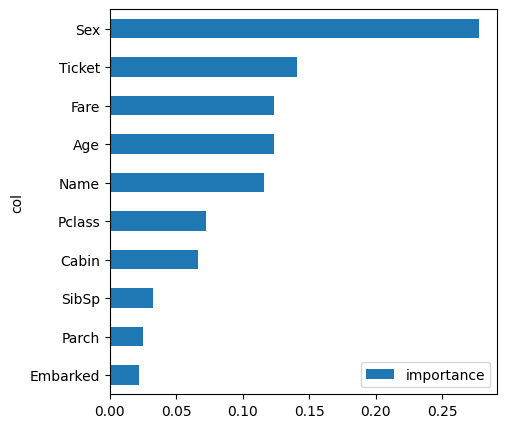

In [ ]:
# ハイパーパラメータチューニングのためのOptunaの設定
def objective_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'random_state': 42
    }
    clf = RandomForestClassifier(**params)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    return cross_val_score(clf, x_train, y_train, cv=cv, scoring='accuracy').mean()

study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=100)
best_params_rf = study_rf.best_params
print("★"*89)
print(f"Best Score: {study_rf.best_value}")
print(f'Best RF params: {best_params_rf}')


# ベストパラメーターでインスタンスの作成
model_rf_best_param = RandomForestClassifier(**best_params_rf)

# データの分割
x_tr, x_va, y_tr, y_va = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# クロスバリデーションの設定
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 学習
y_tr_pred = cross_val_predict(model_rf_best_param, x_tr, y_tr, cv=cv)

# 学習データの精度評価
print("TR Accuracy: ", accuracy_score(y_tr, y_tr_pred))

# クロスバリデーションとは別に再学習
model_rf_best_param.fit(x_tr, y_tr)

# 検証データに対する予測
y_va_pred = model_rf_best_param.predict(x_va)

# 検証データの精度評価
print("VA Accuracy: ", accuracy_score(y_va, y_va_pred))

# 特徴量の重要度を確認
imp_rf = pd.DataFrame({
    "col" : x_train.columns,
    "importance" : model_rf_best_param.feature_importances_
})

imp_rf = imp_rf.set_index(imp_rf["col"])
imp_rf.sort_values(by="importance", ascending=True).plot(kind="barh", figsize=(5, 5))

# テストデータに対する予測
y_test_pred = model_rf_best_param.predict(x_test)
rf_tunig_param_result_df = pd.DataFrame({
    "PassengerId" : id_test["PassengerId"],
    "Survived" : y_test_pred
})

In [ ]:
# rf_tunig_param_result_df.to_csv("rf_optuna_BaseLine.csv", index=False)
# Kaggle Score : 0.77511

# 8. 欠損値の補間

In [144]:
# データの読み込み
# 各種データの読み込み
train_df = pd.read_csv(r"C:\Users\USER\Desktop\Kaggle\Titanic\venv\train.csv")
test_df = pd.read_csv(r"C:\Users\USER\Desktop\Kaggle\Titanic\venv\test.csv")
# train_df/test_dfを区別するための特徴量作成
train_df["train"] = 1
test_df["train"] = 0
test_df["Survived"] = 0

# train_dfとtest_dfを結合
merged_df = pd.concat([train_df, test_df], axis=0)

# merged_df["Embarked"] = merged_df["Embarked"].fillna("S") # 欠損値を補間。理由は下記参照

# # Fareの欠損値補間
# # Fare欠損値のチケット番号と番号が似ている物のFareの平均
# fare_na_fill_value = merged_df[merged_df['Ticket'].str.startswith('37')]["Fare"].mean()
# merged_df["Fare"] = merged_df["Fare"].fillna(fare_na_fill_value)

# # Pclass=1において、Fare=0のデータがあり、その中で、下記データの異常を見つけたので削除する
# delete_data_index = merged_df[merged_df['Ticket'].str.startswith('695')].index # 1件のみで、他に類似データ無し
# merged_df = merged_df.drop(index=delete_data_index)

### Pclass == 1 / Fare == 0.0 の置き換え
# # Pclass=1のFareの平均値
# mean_of_pclass1_fare = merged_df.query("Pclass == 1")["Fare"].mean()
# # Pclass=1のFareの標準偏差
# std_of_pclass1_fare = merged_df.query("Pclass == 1")["Fare"].std()

# lower_bound = mean_of_pclass1_fare - std_of_pclass1_fare
# upper_bound = mean_of_pclass1_fare + std_of_pclass1_fare

# inside_of_std = merged_df.query(f"Pclass == 1 & {lower_bound} <= Fare <= {upper_bound}")

# # Pclass = 1 & Fare = 0のデータについて置き換え
# # 条件設定
# mask = (merged_df["Pclass"] == 1) & (merged_df["Fare"] == 0.0)
# merged_df["Fare"] = np.where(mask, inside_of_std["Fare"].mean(), merged_df["Fare"])

### Pclass == 2 / Fare == 0.0 の置き換え
# # Pclass=2のFareの平均値
# mean_of_pclass2_fare = merged_df.query("Pclass == 2")["Fare"].mean()
# # Pclass=2のFareの標準偏差
# std_of_pclass2_fare = merged_df.query("Pclass == 2")["Fare"].std()

# lower_bound = mean_of_pclass2_fare - std_of_pclass2_fare
# upper_bound = mean_of_pclass2_fare + std_of_pclass2_fare

# inside_of_std = merged_df.query(f"Pclass == 2 & {lower_bound} <= Fare <= {upper_bound}")
# print("補間値 : ", inside_of_std["Fare"].mean())
# # Pclass = 1 & Fare = 0のデータについて置き換え
# # 条件設定
# mask = (merged_df["Pclass"] == 2) & (merged_df["Fare"] == 0.0)
# merged_df["Fare"] = np.where(mask, inside_of_std["Fare"].mean(), merged_df["Fare"])

# # 条件設定
# mask = (merged_df["Pclass"] == 3) & (merged_df["Fare"] == 0.0)
# # Pclass3 / Fareの最頻値を変数化
# pclass3_fare_mode = merged_df.query("Pclass == 3")["Fare"].mode()
# # 数値の置き換え
# merged_df["Fare"] = np.where(mask, pclass3_fare_mode, merged_df["Fare"])


補間値 :  17.966008298755188


<Axes: >

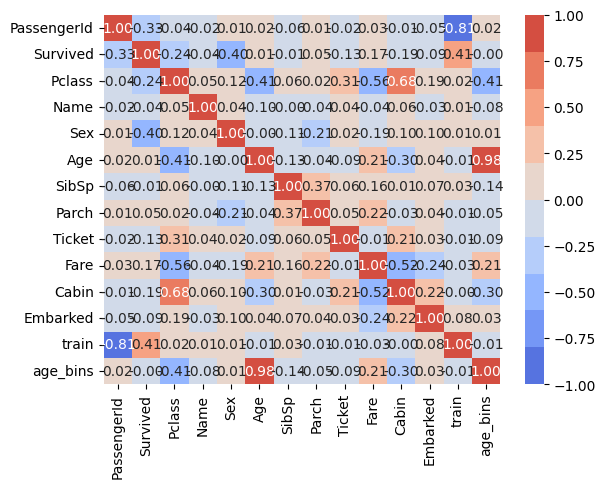

In [86]:
# 相関関係を再確認
na_merged_df = merged_df.copy().reset_index(drop=True)
# LabelEncoding
for col in na_merged_df.columns:
    le = LabelEncoder()
    if na_merged_df[col].dtype == "object":
        na_merged_df[col] = le.fit_transform(na_merged_df[col])

na_merged_df["Age"] = na_merged_df["Age"].fillna(-1)
na_merged_df["age_bins"] = pd.cut(na_merged_df["Age"], bins=[-5, 0, 10, 20, 30, 40, 50, 60, 70, 80, 100],
                                  labels=[-1, 0, 10, 20, 30, 40, 50, 60, 70, 80], right=False).astype("int")
# ヒートマップを描画
cor = na_merged_df.corr()
sns.heatmap(cor, cmap= sns.color_palette('coolwarm', 10), annot=True,fmt='.2f', vmin = -1, vmax = 1)



### Embarkedの欠損値補間

In [83]:
# Embarkedが欠損しているデータの確認
print("Embarkedが欠損しているデータ")
merged_df.query("Embarked.isnull()")
# SibSp, Parch = 0 なので、同乗者無しだが、同室、同一チケット番号なので、何かしらの関係はあるのか？

Embarkedが欠損しているデータ


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1


In [79]:
c_merged_df = merged_df.copy()
c_merged_df["Cabin"] = c_merged_df["Cabin"].fillna("ABC") # maskように一旦Cabinの欠損値を補間
print("CabinがB2から始まるデータの確認")
display(c_merged_df[c_merged_df['Cabin'].str.startswith('B2')]) # CabinがB2から始まるデータのみを抽出
print("チケット番号の一致者を確認")
display(c_merged_df.query("Ticket == '113572'")) # チケット番号が一緒のデータを確認 = NaN以外に無し

CabinがB2から始まるデータの確認


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.00,B28,NaN,1
540,541,1,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.00,B22,S,1
690,691,1,1,"Dick, Mr. Albert Adrian",male,31.0,1,0,17474,57.00,B20,S,1
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.00,B22,S,1
781,782,1,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",female,17.0,1,0,17474,57.00,B20,S,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.00,B28,NaN,1
305,1197,0,1,"Crosby, Mrs. Edward Gifford (Catherine Elizabe...",female,64.0,1,1,112901,26.55,B26,S,0
390,1282,0,1,"Payne, Mr. Vivian Ponsonby",male,23.0,0,0,12749,93.50,B24,S,0


チケット番号の一致者を確認


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1


In [ ]:
# 念のため名前の文字列を含むデータを諸々確認したが、配偶者や親/子どもと見受けられるデータ無し
c_merged_df[c_merged_df['Name'].str.contains('Nelson')] # 特定文字列を含む場合のデータの確認方法

Icard / Amelieはフランスに多い名前だが、Stone, Mrs. George Nelson (Martha Evelyn)は英米で一般的な名前であり、  
乗船者数もSouthamptonが一番多い事から、**この二人のEmbarkedはSと推測**  
(BaseLineのimpからも、そこまで重要な特徴量ではなさそうなので、そこまでしっかり確認は不要かと)  
Cherbourgはフランス、QueenstownはニュージーランドSouthamptonはイギリス

In [ ]:
merged_df["Embarked"] = merged_df["Embarked"].fillna("S") # 欠損値を補間

### Fareの欠損値補間

In [88]:
# Fareが欠損しているデータの確認
print("Fareが欠損しているデータ")
merged_df.query("Fare.isnull()")

Fareが欠損しているデータ


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
152,1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0


In [93]:
print("チケット番号が同じデータの確認")
display(merged_df.query("Ticket == '3701'")) # 同じチケット番号無し
# Pclass = 3の価格平均を確認
print("Pclass = 3の価格平均 : ", merged_df.query("Pclass == 3")["Fare"].mean())

チケット番号が同じデータの確認


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
152,1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0


Pclass = 3の価格平均 :  13.302888700564973


In [127]:
# チケット番号が似ている人たちのデータを確認
similar_Ticket_fare_na = merged_df[merged_df['Ticket'].str.startswith('37')].sort_values(by="Ticket") # 特定文字列を含む場合のデータの確認方法
similar_Ticket_fare_na.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
152,1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,12.8375,NaN,S,0
284,1176,0,3,"Rosblom, Miss. Salli Helena",female,2.0,1,1,370129,20.2125,NaN,S,0
254,255,0,3,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",female,41.0,0,2,370129,20.2125,NaN,S,1
424,425,0,3,"Rosblom, Mr. Viktor Richard",male,18.0,1,1,370129,20.2125,NaN,S,1
186,187,1,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,NaN,1,0,370365,15.5000,NaN,Q,1


Fareの欠損値に関しては、チケット番号が似ている = 同じような等級の客室 = 運賃も似たような感じになると予想し、  
チケット番号が37から始まるデータの平均値で欠損値を補間する

In [ ]:
# Fareの欠損値補間
# Fare欠損値のチケット番号と番号が似ている物のFareの平均
fare_na_fill_value = merged_df[merged_df['Ticket'].str.startswith('37')]["Fare"].mean()
merged_df["Fare"] = merged_df["Fare"].fillna(fare_na_fill_value)

#### Pclass=1のFareについて確認

<Axes: xlabel='Fare'>

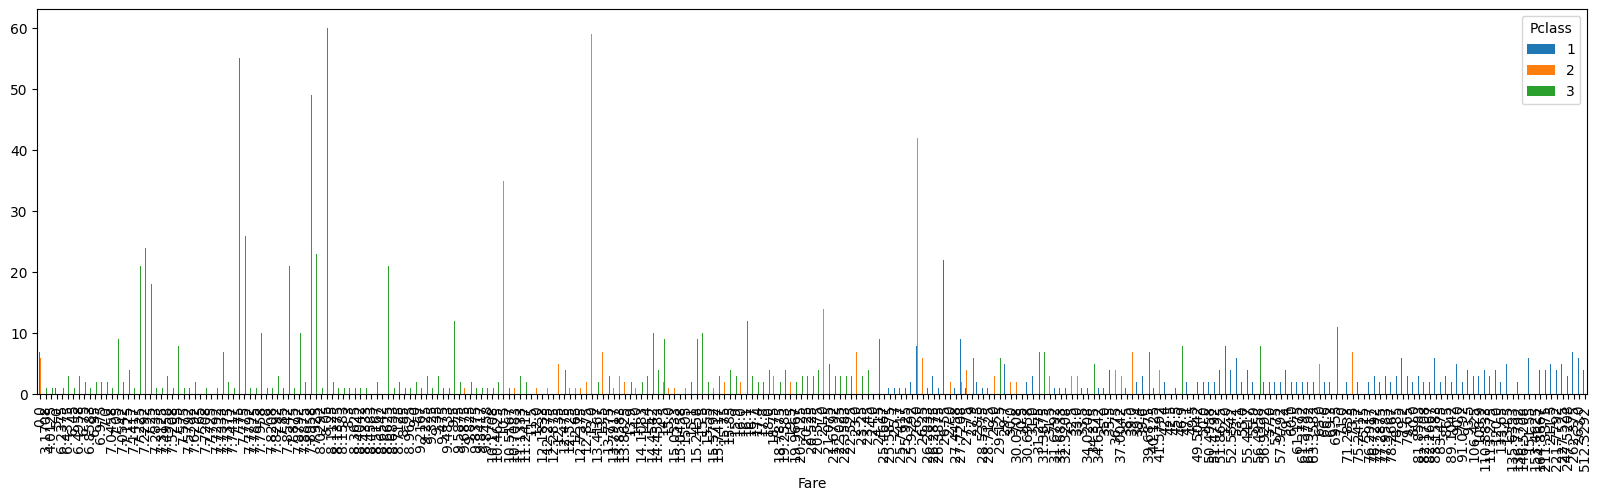

In [100]:
# Pclassの価格の分布を視覚化
merged_df.groupby(["Fare", "Pclass"]).size().unstack().plot(kind="bar", stacked=False, figsize=(20, 5))

Pclass1のFareについて
平均運賃 : 87.509
標準偏差 : 80.447
標準偏差範囲 :  7.061813391963511 ~ 167.95616988977025


<Axes: xlabel='Fare'>

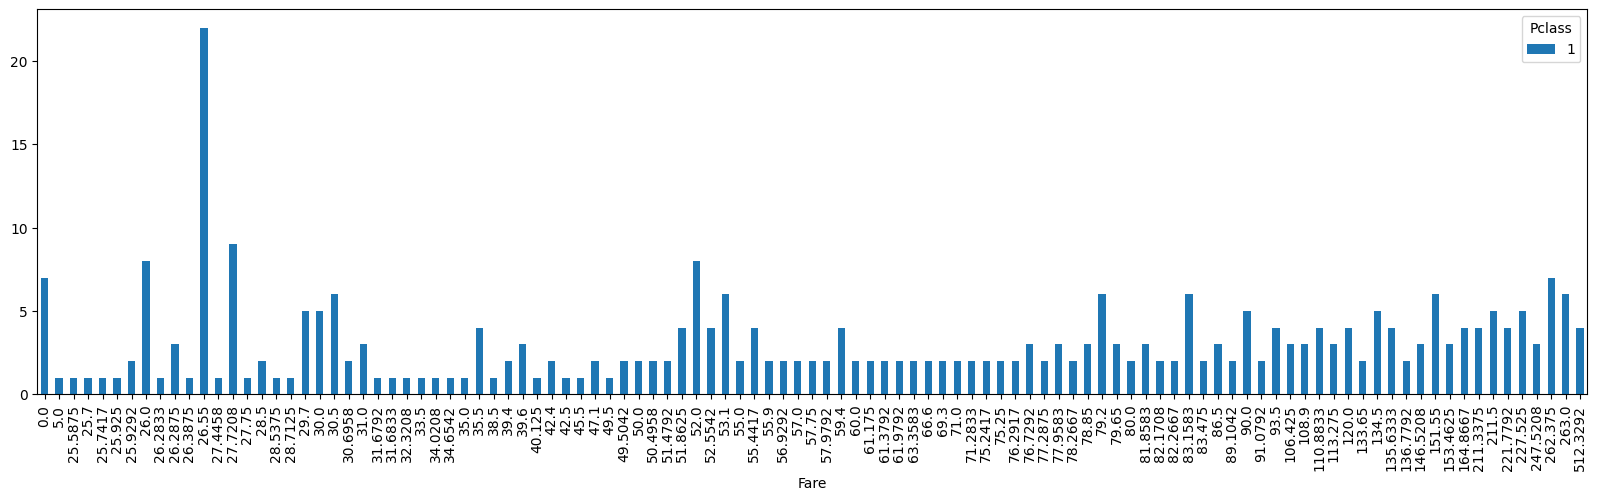

In [15]:
# Pclass=1のFareの平均値
mean_of_pclass1_fare = merged_df.query("Pclass == 1")["Fare"].mean()
# Pclass=1のFareの標準偏差
std_of_pclass1_fare = merged_df.query("Pclass == 1")["Fare"].std()
print("Pclass1のFareについて")
print("平均運賃 : {:.3f}".format(mean_of_pclass1_fare))
print("標準偏差 : {:.3f}".format(std_of_pclass1_fare))
print("標準偏差範囲 : ", mean_of_pclass1_fare - std_of_pclass1_fare, "~", mean_of_pclass1_fare + std_of_pclass1_fare)
pcla1_df = merged_df[merged_df["Pclass"] == 1]
pcla1_df.groupby(["Fare", "Pclass"]).size().unstack().plot(kind="bar", stacked=False, figsize=(20, 5))


In [158]:
# Fare <=5.0, 211.3375 <= Fareとなっているデータについて確認
outlier_of_Pclass1 = merged_df.query("Pclass == 1 & (Fare <= 5.0 | Fare >= 211.3375)").sort_values(by="Fare", ascending=True)
outlier_of_Pclass1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S,1
372,1264,0,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0000,B52 B54 B56,S,0
266,1158,0,1,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0000,NaN,S,0
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S,1
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,NaN,S,1
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0000,B102,S,1
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S,1
324,1216,0,1,"Kreuchen, Miss. Emilie",female,39.0,0,0,24160,211.3375,NaN,S,0
779,780,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.0,0,1,24160,211.3375,B3,S,1
730,731,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,1


In [159]:
# 同じ客室番号で他にデータが無いか確認
outlier_Pclass1_Cabin_list = set(outlier_of_Pclass1["Cabin"].tolist())
outlier_Pclass1_Cabin_list

for cabin in outlier_Pclass1_Cabin_list:
    # print("★"*89)
    print(f"現在のCabinは{cabin}です")
    display(merged_df.query(f"Cabin == '{cabin}'"))

現在のCabinはnanです


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train


現在のCabinはB5です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
689,690,1,1,"Madill, Miss. Georgette Alexandra",female,15.0,0,1,24160,211.3375,B5,S,1
730,731,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,1


現在のCabinはB94です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,1


現在のCabinはC132です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
75,967,0,1,"Keeping, Mr. Edwin",male,32.5,0,0,113503,211.5,C132,C,0


現在のCabinはB57 B59 B63 B66です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C,1
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C,1
24,916,0,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.375,B57 B59 B63 B66,C,0
64,956,0,1,"Ryerson, Master. John Borie",male,13.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C,0
142,1034,0,1,"Ryerson, Mr. Arthur Larned",male,61.0,1,3,PC 17608,262.375,B57 B59 B63 B66,C,0


現在のCabinはC23 C25 C27です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S,1
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,C23 C25 C27,S,1
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,C23 C25 C27,S,1
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S,1
53,945,0,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0,C23 C25 C27,S,0
69,961,0,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0,C23 C25 C27,S,0


現在のCabinはC130です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
74,966,0,1,"Geiger, Miss. Amalie",female,35.0,0,0,113503,211.5,C130,C,0


現在のCabinはC55 C57です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
81,973,0,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S,0
114,1006,0,1,"Straus, Mrs. Isidor (Rosalie Ida Blun)",female,63.0,1,0,PC 17483,221.7792,C55 C57,S,0


現在のCabinはB101です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,1


現在のCabinはB102です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0,B102,S,1


現在のCabinはB3です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
779,780,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.0,0,1,24160,211.3375,B3,S,1


現在のCabinはC95です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S,1


現在のCabinはC62 C64です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
700,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.525,C62 C64,C,1
202,1094,0,1,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.525,C62 C64,C,0


現在のCabinはB51 B53 B55です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,1
343,1235,0,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,0


現在のCabinはC45です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
716,717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.525,C45,C,1


現在のCabinはB61です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
59,951,0,1,"Chaudanson, Miss. Victorine",female,36.0,0,0,PC 17608,262.375,B61,C,0


現在のCabinはC82です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5,C82,C,1


現在のCabinはC80です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
218,1110,0,1,"Widener, Mrs. George Dunton (Eleanor Elkins)",female,50.0,1,1,113503,211.5,C80,C,0
407,1299,0,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5,C80,C,0


現在のCabinはA36です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S,1


現在のCabinはC97です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
156,1048,0,1,"Bird, Miss. Ellen",female,29.0,0,0,PC 17483,221.7792,C97,S,0


現在のCabinはB52 B54 B56です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
372,1264,0,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0,B52 B54 B56,S,0


現在のCabinはB58 B60です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,1
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,1
184,1076,0,1,"Douglas, Mrs. Frederick Charles (Mary Helene B...",female,27.0,1,1,PC 17558,247.5208,B58 B60,C,0


In [155]:
# Cabin B51, B53, B55での以上データと同じチケット番号のデータがあるか確認
merged_df[merged_df['Ticket'].str.startswith('695')] # 1件のみで、他に類似データ無し

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0,B51 B53 B55,S,1


CabinはB51 B53 B55において、Ticket = 695のデータが明らかにおかしく、同じチケット番号が無い事、  
SibSp, Parchも0であること、他の二つのデータはEmbarked=Cであるのに対して、Sである事等から、  
記入ミスか何かと判断、trainデータであることから、こちらは削除する

In [ ]:
# Pclass=1において、Fare=0のデータがあり、その中で、下記データの異常を見つけたので削除する
delete_data_index = merged_df[merged_df['Ticket'].str.startswith('695')].index # 1件のみで、他に類似データ無し
merged_df = merged_df.drop(index=delete_data_index)

In [160]:
# 同じチケット番号で他にデータが無いか確認
outlier_Pclass1_Ticket_list = set(outlier_of_Pclass1["Ticket"].tolist())
outlier_Pclass1_Ticket_list

for Ticket in outlier_Pclass1_Ticket_list:
    # print("★"*89)
    print(f"現在のTicketは{Ticket}です")
    display(merged_df.query(f"Ticket == '{Ticket}'"))

現在のTicketは112050です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S,1


現在のTicketはPC 17483です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S,1
81,973,0,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S,0
114,1006,0,1,"Straus, Mrs. Isidor (Rosalie Ida Blun)",female,63.0,1,0,PC 17483,221.7792,C55 C57,S,0
156,1048,0,1,"Bird, Miss. Ellen",female,29.0,0,0,PC 17483,221.7792,C97,S,0


現在のTicketは19972です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S,1


現在のTicketはPC 17757です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.525,NaN,C,1
557,558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.525,NaN,C,1
700,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.525,C62 C64,C,1
716,717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.525,C45,C,1
202,1094,0,1,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.525,C62 C64,C,0


現在のTicketは113503です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5,C82,C,1
74,966,0,1,"Geiger, Miss. Amalie",female,35.0,0,0,113503,211.5,C130,C,0
75,967,0,1,"Keeping, Mr. Edwin",male,32.5,0,0,113503,211.5,C132,C,0
218,1110,0,1,"Widener, Mrs. George Dunton (Eleanor Elkins)",female,50.0,1,1,113503,211.5,C80,C,0
407,1299,0,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5,C80,C,0


現在のTicketは112051です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
266,1158,0,1,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0,NaN,S,0


現在のTicketはPC 17558です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,1
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,1
184,1076,0,1,"Douglas, Mrs. Frederick Charles (Mary Helene B...",female,27.0,1,1,PC 17558,247.5208,B58 B60,C,0


現在のTicketはPC 17608です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C,1
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C,1
24,916,0,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.375,B57 B59 B63 B66,C,0
59,951,0,1,"Chaudanson, Miss. Victorine",female,36.0,0,0,PC 17608,262.375,B61,C,0
64,956,0,1,"Ryerson, Master. John Borie",male,13.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C,0
142,1034,0,1,"Ryerson, Mr. Arthur Larned",male,61.0,1,3,PC 17608,262.375,B57 B59 B63 B66,C,0
375,1267,0,1,"Bowen, Miss. Grace Scott",female,45.0,0,0,PC 17608,262.375,NaN,C,0


現在のTicketは19950です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S,1
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,C23 C25 C27,S,1
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,C23 C25 C27,S,1
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S,1
53,945,0,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0,C23 C25 C27,S,0
69,961,0,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0,C23 C25 C27,S,0


現在のTicketは112058です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0,B102,S,1
372,1264,0,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0,B52 B54 B56,S,0


現在のTicketはPC 17755です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,1
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,1
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,1
343,1235,0,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,0


現在のTicketは112052です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,1


現在のTicketは24160です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
689,690,1,1,"Madill, Miss. Georgette Alexandra",female,15.0,0,1,24160,211.3375,B5,S,1
730,731,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,1
779,780,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.0,0,1,24160,211.3375,B3,S,1
324,1216,0,1,"Kreuchen, Miss. Emilie",female,39.0,0,0,24160,211.3375,NaN,S,0


現在のTicketは112059です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,1


In [167]:
display(merged_df.query("Cabin == 'B52 B54 B56'"))
merged_df.query("Cabin == 'B102'")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
372,1264,0,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0,B52 B54 B56,S,0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0,B102,S,1


チケット番号の確認からは特に新たな発見は無かった。  
上側の外れ値であるデータに関しては、家族連れでの同室のデータが多かったので、  
広い部屋故に少し高い？と思われるので、そのままにしておく。  
価格が0のものに関しては、標準偏差範囲のデータの平均値を代入しておく

In [169]:
# Pclass = 1の標準偏差範囲内のデータを抽出(上のoutlier_of_Pclass1のインデックスを使用してdropしても良いが、後々見返した時に分かりにくいので、ここで完結させる)
# Pclass=1のFareの平均値
mean_of_pclass1_fare = merged_df.query("Pclass == 1")["Fare"].mean()
# Pclass=1のFareの標準偏差
std_of_pclass1_fare = merged_df.query("Pclass == 1")["Fare"].std()

lower_bound = mean_of_pclass1_fare - std_of_pclass1_fare
upper_bound = mean_of_pclass1_fare + std_of_pclass1_fare

inside_of_std = merged_df.query(f"Pclass == 1 & {lower_bound} <= Fare <= {upper_bound}")

# Pclass = 1 & Fare = 0のデータについて置き換え
# 条件設定
mask = (merged_df["Pclass"] == 1) & (merged_df["Fare"] == 0.0)
merged_df["Fare"] = np.where(mask, inside_of_std["Fare"].mean(), merged_df["Fare"])

65.43793610108304

#### Pclass=2のFareについて確認

Pclass2のFareについて
平均運賃 : 21.179
標準偏差 : 13.607
標準偏差範囲 :  7.572074334355406 ~ 34.786318445427995


<Axes: xlabel='Fare'>

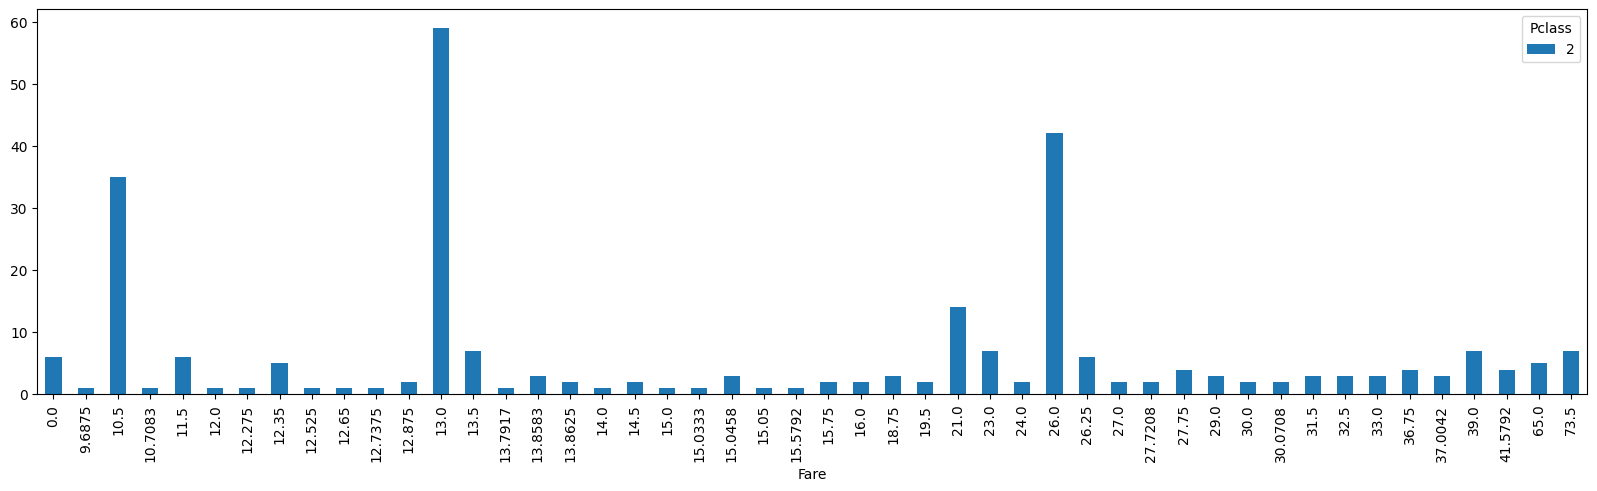

In [16]:
# Pclass = 2のFareの平均値
mean_of_pclass2_fare = merged_df.query("Pclass == 2")["Fare"].mean()
# Pclass = 2のFareの標準偏差
std_of_pclass2_fare = merged_df.query("Pclass == 2")["Fare"].std()
print("Pclass2のFareについて")
print("平均運賃 : {:.3f}".format(mean_of_pclass2_fare))
print("標準偏差 : {:.3f}".format(std_of_pclass2_fare))
lower_bound_pclass2 = mean_of_pclass2_fare - std_of_pclass2_fare
upper_bound_pclass2 = mean_of_pclass2_fare + std_of_pclass2_fare
print("標準偏差範囲 : ", lower_bound_pclass2, "~", upper_bound_pclass2)
pcla2_df = merged_df[merged_df["Pclass"] == 2]
pcla2_df.groupby(["Fare", "Pclass"]).size().unstack().plot(kind="bar", stacked=False, figsize=(20, 5))

In [182]:
# 標準偏差範囲外のデータについて確認
outlier_of_Pclass2 = merged_df.query(f"Pclass == 2 & (Fare <= {lower_bound_pclass2} | Fare >= {upper_bound_pclass2})").sort_values(by="Fare", ascending=True)
outlier_of_Pclass2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
674,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0000,NaN,S,1
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S,1
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0000,NaN,S,1
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S,1
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0000,NaN,S,1
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0000,NaN,S,1
145,146,0,2,"Nicholls, Mr. Joseph Charles",male,19.0,1,1,C.A. 33112,36.7500,NaN,S,1
330,1222,0,2,"Davies, Mrs. John Morgan (Elizabeth Agnes Mary...",female,48.0,0,2,C.A. 33112,36.7500,NaN,S,0
176,1068,0,2,"Sincock, Miss. Maude",female,20.0,0,0,C.A. 33112,36.7500,NaN,S,0
549,550,1,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,NaN,S,1


In [183]:
# 同じ客室番号で他にデータが無いか確認
outlier_Pclass2_Cabin_list = set(outlier_of_Pclass2["Cabin"].tolist())
outlier_Pclass2_Cabin_list

for cabin in outlier_Pclass2_Cabin_list:
    # print("★"*89)
    print(f"現在のCabinは{cabin}です")
    display(merged_df.query(f"Cabin == '{cabin}'"))

現在のCabinはnanです


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train


現在のCabinはF4です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
183,184,1,2,"Becker, Master. Richard F",male,1.0,2,1,230136,39.0,F4,S,1
618,619,1,2,"Becker, Miss. Marion Louise",female,4.0,2,1,230136,39.0,F4,S,1
178,1070,0,2,"Becker, Mrs. Allen Oliver (Nellie E Baumgardner)",female,36.0,0,3,230136,39.0,F4,S,0
326,1218,0,2,"Becker, Miss. Ruth Elizabeth",female,12.0,2,1,230136,39.0,F4,S,0


In [184]:
# 同じチケット番号で他にデータが無いか確認
outlier_Pclass2_Ticket_list = set(outlier_of_Pclass2["Ticket"].tolist())
outlier_Pclass2_Ticket_list

for Ticket in outlier_Pclass2_Ticket_list:
    # print("★"*89)
    print(f"現在のTicketは{Ticket}です")
    display(merged_df.query(f"Ticket == '{Ticket}'"))

現在のTicketはSC/Paris 2123です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C,1
608,609,1,2,"Laroche, Mrs. Joseph (Juliette Marie Louise La...",female,22.0,1,2,SC/Paris 2123,41.5792,NaN,C,1
685,686,0,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.0,1,2,SC/Paris 2123,41.5792,NaN,C,1
296,1188,0,2,"Laroche, Miss. Louise",female,1.0,1,2,SC/Paris 2123,41.5792,NaN,C,0


現在のTicketは239853です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,1
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,1
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,1


現在のTicketは239855です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0,NaN,S,1


現在のTicketは230136です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
183,184,1,2,"Becker, Master. Richard F",male,1.0,2,1,230136,39.0,F4,S,1
618,619,1,2,"Becker, Miss. Marion Louise",female,4.0,2,1,230136,39.0,F4,S,1
178,1070,0,2,"Becker, Mrs. Allen Oliver (Nellie E Baumgardner)",female,36.0,0,3,230136,39.0,F4,S,0
326,1218,0,2,"Becker, Miss. Ruth Elizabeth",female,12.0,2,1,230136,39.0,F4,S,0


現在のTicketはS.O.C. 14879です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
72,73,0,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,S.O.C. 14879,73.5,NaN,S,1
120,121,0,2,"Hickman, Mr. Stanley George",male,21.0,2,0,S.O.C. 14879,73.5,NaN,S,1
385,386,0,2,"Davies, Mr. Charles Henry",male,18.0,0,0,S.O.C. 14879,73.5,NaN,S,1
655,656,0,2,"Hickman, Mr. Leonard Mark",male,24.0,2,0,S.O.C. 14879,73.5,NaN,S,1
665,666,0,2,"Hickman, Mr. Lewis",male,32.0,2,0,S.O.C. 14879,73.5,NaN,S,1
212,1104,0,2,"Deacon, Mr. Percy William",male,17.0,0,0,S.O.C. 14879,73.5,NaN,S,0
352,1244,0,2,"Dibden, Mr. William",male,18.0,0,0,S.O.C. 14879,73.5,NaN,S,0


現在のTicketはC.A. 33112です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
145,146,0,2,"Nicholls, Mr. Joseph Charles",male,19.0,1,1,C.A. 33112,36.75,NaN,S,1
549,550,1,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.75,NaN,S,1
176,1068,0,2,"Sincock, Miss. Maude",female,20.0,0,0,C.A. 33112,36.75,NaN,S,0
330,1222,0,2,"Davies, Mrs. John Morgan (Elizabeth Agnes Mary...",female,48.0,0,2,C.A. 33112,36.75,NaN,S,0


現在のTicketは220845です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
615,616,1,2,"Herman, Miss. Alice",female,24.0,1,2,220845,65.0,NaN,S,1
754,755,1,2,"Herman, Mrs. Samuel (Jane Laver)",female,48.0,1,2,220845,65.0,NaN,S,1
230,1122,0,2,"Sweet, Mr. George Frederick",male,14.0,0,0,220845,65.0,NaN,S,0
353,1245,0,2,"Herman, Mr. Samuel",male,49.0,1,2,220845,65.0,NaN,S,0
385,1277,0,2,"Herman, Miss. Kate",female,24.0,1,2,220845,65.0,NaN,S,0


現在のTicketはS.C./PARIS 2079です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
817,818,0,2,"Mallet, Mr. Albert",male,31.0,1,1,S.C./PARIS 2079,37.0042,NaN,C,1
827,828,1,2,"Mallet, Master. Andre",male,1.0,0,2,S.C./PARIS 2079,37.0042,NaN,C,1
361,1253,0,2,"Mallet, Mrs. Albert (Antoinette Magnin)",female,24.0,1,1,S.C./PARIS 2079,37.0042,NaN,C,0


現在のTicketは29750です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
670,671,1,2,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",female,40.0,1,1,29750,39.0,NaN,S,1
684,685,0,2,"Brown, Mr. Thomas William Solomon",male,60.0,1,1,29750,39.0,NaN,S,1
175,1067,0,2,"Brown, Miss. Edith Eileen",female,15.0,0,2,29750,39.0,NaN,S,0


現在のTicketは239854です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,1


現在のTicketは239856です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
674,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0,NaN,S,1


Pclass1と同様の理由で、Fare = 0.0のみ、標準偏差範囲内データの平均値で補間

In [185]:
# Pclass = 1の標準偏差範囲内のデータを抽出(上のoutlier_of_pclass2のインデックスを使用してdropしても良いが、後々見返した時に分かりにくいので、ここで完結させる)
# Pclass=1のFareの平均値
mean_of_pclass2_fare = merged_df.query("Pclass == 2")["Fare"].mean()
# Pclass=1のFareの標準偏差
std_of_pclass2_fare = merged_df.query("Pclass == 2")["Fare"].std()

lower_bound = mean_of_pclass2_fare - std_of_pclass2_fare
upper_bound = mean_of_pclass2_fare + std_of_pclass2_fare

inside_of_std = merged_df.query(f"Pclass == 2 & {lower_bound} <= Fare <= {upper_bound}")
print("補間値 : ", inside_of_std["Fare"].mean())
# Pclass = 1 & Fare = 0のデータについて置き換え
# 条件設定
mask = (merged_df["Pclass"] == 2) & (merged_df["Fare"] == 0.0)
merged_df["Fare"] = np.where(mask, inside_of_std["Fare"].mean(), merged_df["Fare"])

補間値 :  17.966008298755188


#### Pclass=3のFareについて確認

pclass3のFareについて
平均運賃 : 13.303
標準偏差 : 11.494
標準偏差範囲 :  1.8085302471164137 ~ 24.797247154013533


<Axes: xlabel='Fare'>

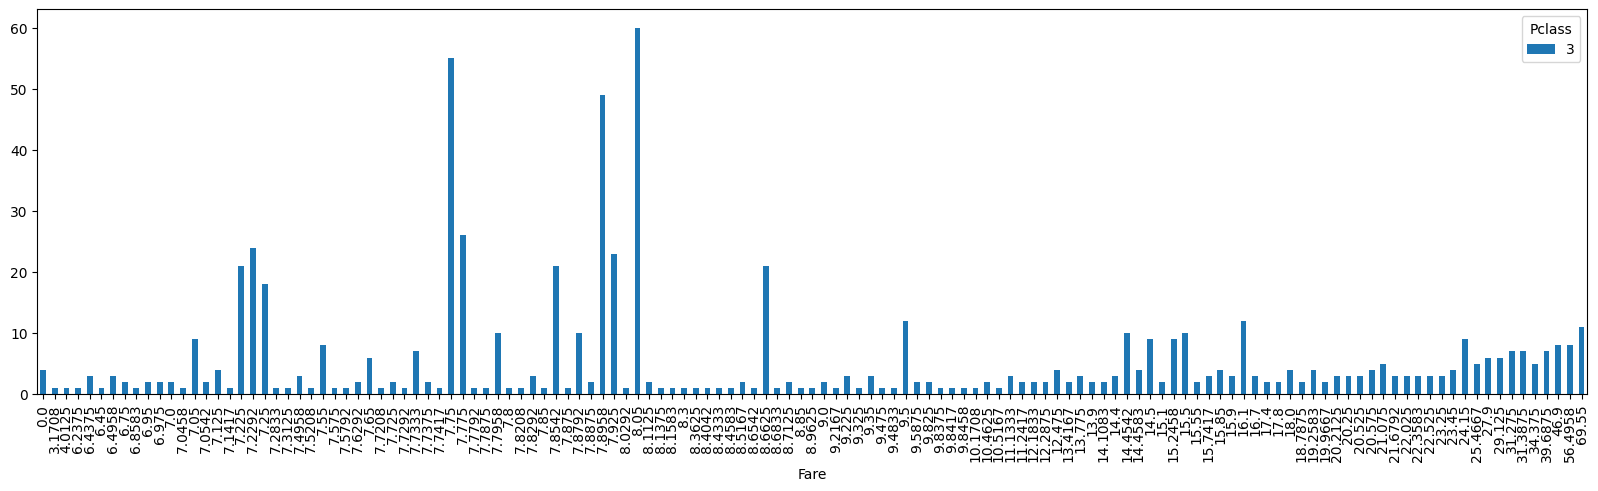

In [17]:
# Pclass = 3のFareの平均値
mean_of_pclass3_fare = merged_df.query("Pclass == 3")["Fare"].mean()
# Pclass = 3のFareの標準偏差
std_of_pclass3_fare = merged_df.query("Pclass == 3")["Fare"].std()
print("pclass3のFareについて")
print("平均運賃 : {:.3f}".format(mean_of_pclass3_fare))
print("標準偏差 : {:.3f}".format(std_of_pclass3_fare))
lower_bound_pclass3 = mean_of_pclass3_fare - std_of_pclass3_fare
upper_bound_pclass3 = mean_of_pclass3_fare + std_of_pclass3_fare
print("標準偏差範囲 : ", lower_bound_pclass3, "~", upper_bound_pclass3)
pcla3_df = merged_df[merged_df["Pclass"] == 3]
pcla3_df.groupby(["Fare", "Pclass"]).size().unstack().plot(kind="bar", stacked=False, figsize=(20, 5))

In [14]:
# 標準偏差範囲外のデータについて確認
outlier_of_Pclass3 = merged_df.query(f"Pclass == 3 & (Fare <= {lower_bound_pclass3} | Fare >= {upper_bound_pclass3})").sort_values(by="Fare", ascending=True)
outlier_of_Pclass3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,NaN,S,1
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0000,NaN,S,1
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,NaN,S,1
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S,1
229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,NaN,S,1
176,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S,1
485,486,0,3,"Lefebre, Miss. Jeannie",female,NaN,3,1,4133,25.4667,NaN,S,1
409,410,0,3,"Lefebre, Miss. Ida",female,NaN,3,1,4133,25.4667,NaN,S,1
132,1024,0,3,"Lefebre, Mrs. Frank (Frances)",female,NaN,0,4,4133,25.4667,NaN,S,0
360,361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9000,NaN,S,1


In [18]:
# 同じ客室番号で他にデータが無いか確認
outlier_Pclass3_Cabin_list = set(outlier_of_Pclass3["Cabin"].tolist())
outlier_Pclass3_Cabin_list

for cabin in outlier_Pclass3_Cabin_list:
    # print("★"*89)
    print(f"現在のCabinは{cabin}です")
    display(merged_df.query(f"Cabin == '{cabin}'"))

# データにNaNしかないので、調べようがない

現在のCabinはnanです


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train


In [19]:
# 同じチケット番号で他にデータが無いか確認
outlier_Pclass3_Ticket_list = set(outlier_of_Pclass3["Ticket"].tolist())
outlier_Pclass3_Ticket_list

for Ticket in outlier_Pclass3_Ticket_list:
    # print("★"*89)
    print(f"現在のTicketは{Ticket}です")
    display(merged_df.query(f"Ticket == '{Ticket}'"))

現在のTicketは3101295です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S,1
164,165,0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,NaN,S,1
266,267,0,3,"Panula, Mr. Ernesti Arvid",male,16.0,4,1,3101295,39.6875,NaN,S,1
638,639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,NaN,S,1
686,687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S,1
824,825,0,3,"Panula, Master. Urho Abraham",male,2.0,4,1,3101295,39.6875,NaN,S,1
367,1259,0,3,"Riihivouri, Miss. Susanna Juhantytar Sanni""""",female,22.0,0,0,3101295,39.6875,NaN,S,0


現在のTicketは347077です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S,1
182,183,0,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.0,4,2,347077,31.3875,NaN,S,1
233,234,1,3,"Asplund, Miss. Lillian Gertrud",female,5.0,4,2,347077,31.3875,NaN,S,1
261,262,1,3,"Asplund, Master. Edvin Rojj Felix",male,3.0,4,2,347077,31.3875,NaN,S,1
154,1046,0,3,"Asplund, Master. Filip Oscar",male,13.0,4,2,347077,31.3875,NaN,S,0
174,1066,0,3,"Asplund, Mr. Carl Oscar Vilhelm Gustafsson",male,40.0,1,5,347077,31.3875,NaN,S,0
379,1271,0,3,"Asplund, Master. Carl Edgar",male,5.0,4,2,347077,31.3875,NaN,S,0


現在のTicketはCA 2144です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S,1
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S,1
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S,1
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S,1
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S,1
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S,1
139,1031,0,3,"Goodwin, Mr. Charles Frederick",male,40.0,1,6,CA 2144,46.9,NaN,S,0
140,1032,0,3,"Goodwin, Miss. Jessie Allis",female,10.0,5,2,CA 2144,46.9,NaN,S,0


現在のTicketはLINEです


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,1
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,1
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,1
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,1


現在のTicketはW./C. 6608です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
86,87,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.375,NaN,S,1
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.375,NaN,S,1
436,437,0,3,"Ford, Miss. Doolina Margaret ""Daisy""",female,21.0,2,2,W./C. 6608,34.375,NaN,S,1
736,737,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.375,NaN,S,1
167,1059,0,3,"Ford, Mr. Edward Watson",male,18.0,2,2,W./C. 6608,34.375,NaN,S,0


現在のTicketは1601です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S,1
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S,1
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S,1
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S,1
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S,1
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S,1
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S,1
39,931,0,3,"Hee, Mr. Ling",male,NaN,0,0,1601,56.4958,NaN,S,0


現在のTicketは4133です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
176,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S,1
229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,NaN,S,1
409,410,0,3,"Lefebre, Miss. Ida",female,NaN,3,1,4133,25.4667,NaN,S,1
485,486,0,3,"Lefebre, Miss. Jeannie",female,NaN,3,1,4133,25.4667,NaN,S,1
132,1024,0,3,"Lefebre, Mrs. Frank (Frances)",female,NaN,0,4,4133,25.4667,NaN,S,0


現在のTicketは347082です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S,1
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S,1
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S,1
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S,1
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S,1
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S,1
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S,1


現在のTicketは382652です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.125,NaN,Q,1
171,172,0,3,"Rice, Master. Arthur",male,4.0,4,1,382652,29.125,NaN,Q,1
278,279,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.125,NaN,Q,1
787,788,0,3,"Rice, Master. George Hugh",male,8.0,4,1,382652,29.125,NaN,Q,1
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q,1
55,947,0,3,"Rice, Master. Albert",male,10.0,4,1,382652,29.125,NaN,Q,0


現在のTicketはCA. 2343です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,1
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,1
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,1
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,1
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,1
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,1
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,1
188,1080,0,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S,0
342,1234,0,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S,0
360,1252,0,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S,0


現在のTicketは347088です


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9,NaN,S,1
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9,NaN,S,1
360,361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9,NaN,S,1
634,635,0,3,"Skoog, Miss. Mabel",female,9.0,3,2,347088,27.9,NaN,S,1
642,643,0,3,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,347088,27.9,NaN,S,1
819,820,0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.9,NaN,S,1


上側の外れ値は、家族連れや親せき等、複数人同室なので、広めの部屋 = 価格が高くなっていると予想  
価格が0のものに関しては、記入漏れなどの欠損値と予想し、最頻値で補間しておく

In [21]:
# 条件設定
mask = (merged_df["Pclass"] == 3) & (merged_df["Fare"] == 0.0)
# Pclass3 / Fareの最頻値を変数化
pclass3_fare_mode = merged_df.query("Pclass == 3")["Fare"].mode()
# 数値の置き換え
merged_df["Fare"] = np.where(mask, pclass3_fare_mode, merged_df["Fare"])

0    8.05
Name: Fare, dtype: float64

In [106]:
# それぞれのPclassの価格に外れ値があるっぽいので、詳細確認する
print("価格が高い順")
display(merged_df.query("Pclass == 1").sort_values(by="Fare", ascending=False).head(10))
print("価格が低い順")
merged_df.query("Pclass == 1").sort_values(by="Fare", ascending=False).tail(10)


価格が高い順


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,1
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,1
343,1235,0,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,0
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,1
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,1
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,1
69,961,0,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S,0
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,1
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,1
53,945,0,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0000,C23 C25 C27,S,0


価格が低い順


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
77,969,0,1,"Cornell, Mrs. Robert Clifford (Malvina Helen L...",female,55.0,2,0,11770,25.7000,C101,S,0
662,663,0,1,"Colley, Mr. Edward Pomeroy",male,47.0,0,0,5727,25.5875,E58,S,1
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,1
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,NaN,S,1
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S,1
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S,1
372,1264,0,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0000,B52 B54 B56,S,0
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0000,B102,S,1
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S,1
266,1158,0,1,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0000,NaN,S,0


### Ageの欠損値補間

補間案としては  
・  SibSp, Parchの数で分ける  
・  名前のMr, Mrs, Miss, Masterのフラグを作成、更にMr, Mrsに関しては、子どもの数で振り分け  
・  名前の最初のカンマまでを区切りLabelEncodingを実施(家族で同じ値の特徴量になるかと思うが、同じ名前の世帯がある可能性もあるので、要確認)  
・　上記の家族構成に加えて、Pclassも加味してグラフで確認し、傾向があるようであれば分ける  
・  欠損値の値が多いので、年齢予測のモデルを作成してもいいかもしれない(上記のやり方は後回しで、先にモデルで予測したデータで分析進めて、時間があれば上記の方法でもいいかも)

#### Ageを学習モデルを使って補間

In [145]:
# モデルで分割するにあたり、いくつか特徴量を追加
# 名前の最初のカンマまでを取り出す
merged_df["Last_Name"] = merged_df["Name"].str.split(",", expand=True)[0]

# Mr, Mrs, Master, Missが含まれていればそれを取り出す
merged_df["Title"] = merged_df["Name"].str.extract(r'(Mr\.|Master|Miss\.|Mrs\.)')
# Titleが欠損値の部分に関しては"None"で埋める
merged_df["Title"] = merged_df["Title"].fillna("No_Title")

# SibSP >= 1にFlag
merged_df["flag_of_SibSp"] = np.where(merged_df["SibSp"] >= 1, 1, 0)
# Parch >= 1にFlag
merged_df["flag_of_Parch"] = np.where(merged_df["Parch"] >= 1, 1, 0)

age_merged_df = merged_df.copy()
# ラベルエンコーディング
for col in age_merged_df.columns:
    if age_merged_df[col].dtype == "object":
        le = LabelEncoder()
        age_merged_df[col] = le.fit_transform(age_merged_df[col])

age_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1308 entries, 0 to 417
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    1308 non-null   int64  
 1   Survived       1308 non-null   int64  
 2   Pclass         1308 non-null   int64  
 3   Name           1308 non-null   int32  
 4   Sex            1308 non-null   int32  
 5   Age            1045 non-null   float64
 6   SibSp          1308 non-null   int64  
 7   Parch          1308 non-null   int64  
 8   Ticket         1308 non-null   int32  
 9   Fare           1308 non-null   float64
 10  Cabin          1308 non-null   int32  
 11  Embarked       1308 non-null   int32  
 12  train          1308 non-null   int64  
 13  Last_Name      1308 non-null   int32  
 14  Title          1308 non-null   int32  
 15  flag_of_SibSp  1308 non-null   int32  
 16  flag_of_Parch  1308 non-null   int32  
dtypes: float64(2), int32(9), int64(6)
memory usage: 138.0 KB


In [146]:
# データをAgeが欠損値か否かで分割
age_train_df = age_merged_df[~age_merged_df["Age"].isna()].reset_index(drop=True)
print(len(age_train_df))
age_test_df = age_merged_df[age_merged_df["Age"].isna()].reset_index(drop=True)
age_test_df = age_test_df.drop(columns="Age", axis=1)
print(len(age_test_df))

# 学習データと検証データに分ける
age_x_train = age_train_df.drop(columns="Age", axis=1)
age_y_train = age_train_df["Age"]

age_x_test = age_test_df

1045
263


In [147]:
# LightGBMでAgeの欠損値を予測

# データの分割
x_tr, x_va, y_tr, y_va = train_test_split(age_x_train, age_y_train, test_size=0.2, random_state=42)

# LightGBM用のデータセットの作成
lgb_train = lgb_op.Dataset(x_tr, label=y_tr)
lgb_test = lgb_op.Dataset(x_va, label=y_va)

# パラメーターの設定
params = {
  'objective':'regression',
  'metric': 'mae',
  'force_row_wise' : True,
  'verbose': -1
}

st_time = time.time()

# チューニングの開始
base_tuner = lgb_op.LightGBMTunerCV(params, lgb_train, num_boost_round=700, optuna_seed=123, folds=KFold(n_splits=5, shuffle=True, random_state=42))
base_tuner.run()

print("Best_Score: ", {base_tuner.best_score})
print("Best_Params: ", base_tuner.best_params)

ed_time = time.time()
print("所要時間: ", ed_time - st_time)

# ベストパラメーターを変数に格納
best_params = base_tuner.best_params

# ベストパラメーターでLightGBMのモデルを作成&学習
best_model = lgb.LGBMRegressor(**best_params)
best_model.fit(x_tr, y_tr)

# モデルの評価
y_va_pred = best_model.predict(x_va)
print("MAE: ", mean_absolute_error(y_va, y_va_pred))

# 予測データの推論
y_test_pred = best_model.predict(age_x_test)
y_test_pred

age_result_df = pd.DataFrame({
    "PassengerId" : age_x_test["PassengerId"],
    "Age" : y_test_pred.round()
})

age_result_df.head(5)

[I 2024-07-07 00:13:57,774] A new study created in memory with name: no-name-570a811b-d623-49e2-9cf2-0cb3ceb95622
min_child_samples, val_score: 8.659187: 100%|##########| 5/5 [00:02<00:00,  2.23it/s]

Best_Score:  {8.659186733275854}
Best_Params:  {'objective': 'regression', 'metric': 'l1', 'force_row_wise': True, 'verbose': -1, 'feature_pre_filter': False, 'lambda_l1': 3.205562326734723e-06, 'lambda_l2': 1.4037703954712852e-05, 'num_leaves': 3, 'feature_fraction': 0.6, 'bagging_fraction': 0.9944652154753377, 'bagging_freq': 7, 'min_child_samples': 20}
所要時間:  51.18381452560425
MAE:  7.835353869721853


,PassengerId,Age
0,6,28.0
1,18,31.0
2,20,29.0
3,27,28.0
4,29,21.0


In [148]:
# 予測値をmerged_dfに結合
merged_df = merged_df.merge(age_result_df, on="PassengerId", how="left")
merged_df["Age_x"].fillna(merged_df["Age_y"], inplace=True)
merged_df.drop(columns="Age_y", inplace=True)
merged_df.rename(columns={"Age_x" : "Age"}, inplace=True)
merged_df.isna().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin            1014
Embarked            0
train               0
Last_Name           0
Title               0
flag_of_SibSp       0
flag_of_Parch       0
dtype: int64

### Cabinの欠損値補間

In [149]:
print("Pclass3の客室番号一覧", merged_df.query("Pclass == 3")["Cabin"].unique())
print("Pclass3の最頻客室番号", merged_df.query("Pclass == 3")["Cabin"].mode())

print("Pclass2の客室番号一覧", merged_df.query("Pclass == 2")["Cabin"].unique())
print("Pclass2の最頻客室番号", merged_df.query("Pclass == 2")["Cabin"].mode())

print("Pclass1の客室番号一覧", merged_df.query("Pclass == 1")["Cabin"].unique())
print("Pclass1の最頻客室番号", merged_df.query("Pclass == 1")["Cabin"].mode())


Pclass3の客室番号一覧 [nan 'G6' 'F G73' 'F E69' 'E10' 'F G63' 'E121' 'F38' 'F E46' 'F E57']
Pclass3の最頻客室番号 0    G6
Name: Cabin, dtype: object
Pclass2の客室番号一覧 [nan 'D56' 'F33' 'E101' 'F2' 'F4' 'D' 'E77' 'F' 'D38']
Pclass2の最頻客室番号 0      D
1     F2
2    F33
3     F4
Name: Cabin, dtype: object
Pclass1の客室番号一覧 ['C85' 'C123' 'E46' 'C103' 'A6' 'C23 C25 C27' nan 'B78' 'D33' 'B30' 'C52'
 'B28' 'C83' 'E31' 'A5' 'D10 D12' 'D26' 'C110' 'B58 B60' 'D47' 'B86' 'C2'
 'E33' 'B19' 'A7' 'C49' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78'
 'D35' 'C87' 'B77' 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49'
 'C22 C26' 'C106' 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32'
 'B18' 'C124' 'C91' 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98'
 'E44' 'A34' 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30'
 'D20' 'B79' 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16'
 'C101' 'C68' 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26'
 'D48' 'E58' 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' '

上記の一覧から、Pclass3 = G, Pclass2 = D, Pclass1 = C でcabinの欠損値は補完する

In [150]:
# Cabinの欠損値補間
mask1 = (merged_df["Pclass"] == 1) & (merged_df["Cabin"].isna())
merged_df["Cabin"] = np.where(mask1, "G", merged_df["Cabin"])

mask2 = (merged_df["Pclass"] == 2) & (merged_df["Cabin"].isna())
merged_df["Cabin"] = np.where(mask2, "D", merged_df["Cabin"])

mask3 = (merged_df["Pclass"] == 3) & (merged_df["Cabin"].isna())
merged_df["Cabin"] = np.where(mask3, "C", merged_df["Cabin"])

merged_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
train            0
Last_Name        0
Title            0
flag_of_SibSp    0
flag_of_Parch    0
dtype: int64

#### 欠損値補完したデータをcsv出力

In [152]:
merged_df.to_csv("fill_na_merged_df.csv", index=False)

In [153]:
# pd.set_option("display.max_rows", None) # 表示行数の制限解除
pd.reset_option("display.max_rows")  # 再度制限を設ける

# 9. 欠損値補間データでLightGBM(Kaggle : 0.76555)

In [184]:
# 欠損値補間したデータの読み込み
merged_df = pd.read_csv(r"C:\Users\USER\Desktop\Kaggle\Titanic\venv\fill_na_merged_df.csv")
merged_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train,Last_Name,Title,flag_of_SibSp,flag_of_Parch
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C,S,1,Braund,Mr.,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Cumings,Mrs.,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C,S,1,Heikkinen,Miss.,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Futrelle,Mrs.,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C,S,1,Allen,Mr.,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,1305,0,3,"Spector, Mr. Woolf",male,29.0,0,0,A.5. 3236,8.0500,C,S,0,Spector,Mr.,0,0
1304,1306,0,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0,Oliva y Ocana,No_Title,0,0
1305,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,C,S,0,Saether,Mr.,0,0
1306,1308,0,3,"Ware, Mr. Frederick",male,30.0,0,0,359309,8.0500,C,S,0,Ware,Mr.,0,0


In [185]:
# LabelEncoding
for col in merged_df.columns:
    le = LabelEncoder()
    if merged_df[col].dtype == "object":
        merged_df[col] = le.fit_transform(merged_df[col])

print(merged_df.shape)

# 再度train_df, test_dfに分割
train_df = merged_df[merged_df["train"] == 1].copy()
test_df = merged_df[merged_df["train"] == 0].copy()
print(train_df.shape, test_df.shape)

# # 学習データ
x_train = train_df.drop(columns=["PassengerId", "Survived", "train"])
y_train = train_df["Survived"]
id_train = train_df[["PassengerId"]]
print("Train_data")
print(train_df.shape, x_train.shape, y_train.shape, id_train.shape)
# テストデータ
x_test = test_df.drop(columns=["PassengerId", "Survived", "train"])
id_test = test_df[["PassengerId"]]
print("Test_df")
print(test_df.shape, x_test.shape, id_test.shape)

(1308, 17)
(890, 17) (418, 17)
Train_data
(890, 17) (890, 14) (890,) (890, 1)
Test_df
(418, 17) (418, 14) (418, 1)


In [187]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 890 entries, 0 to 889
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pclass         890 non-null    int64  
 1   Name           890 non-null    int32  
 2   Sex            890 non-null    int32  
 3   Age            890 non-null    float64
 4   SibSp          890 non-null    int64  
 5   Parch          890 non-null    int64  
 6   Ticket         890 non-null    int32  
 7   Fare           890 non-null    float64
 8   Cabin          890 non-null    int32  
 9   Embarked       890 non-null    int32  
 10  Last_Name      890 non-null    int32  
 11  Title          890 non-null    int32  
 12  flag_of_SibSp  890 non-null    int64  
 13  flag_of_Parch  890 non-null    int64  
dtypes: float64(2), int32(7), int64(5)
memory usage: 80.0 KB


[I 2024-07-07 00:38:06,042] A new study created in memory with name: no-name-0613e984-d616-4aab-82d6-9dcaf97e241d
[I 2024-07-07 00:38:07,455] Trial 0 finished with value: 0.19095833743721066 and parameters: {'feature_fraction': 0.5}. Best is trial 0 with value: 0.19095833743721066.
[I 2024-07-07 00:38:08,557] Trial 1 finished with value: 0.18112873042450509 and parameters: {'feature_fraction': 0.7}. Best is trial 1 with value: 0.18112873042450509.
[I 2024-07-07 00:38:09,746] Trial 2 finished with value: 0.17831182901605436 and parameters: {'feature_fraction': 0.8}. Best is trial 2 with value: 0.17831182901605436.
[I 2024-07-07 00:38:10,781] Trial 3 finished with value: 0.18256672904560228 and parameters: {'feature_fraction': 0.4}. Best is trial 2 with value: 0.17831182901605436.
[I 2024-07-07 00:38:12,290] Trial 4 finished with value: 0.18114842903575296 and parameters: {'feature_fraction': 0.6}. Best is trial 2 with value: 0.17831182901605436.
[I 2024-07-07 00:38:13,648] Trial 5 finis

Best_Score:  {0.17689352900620509}
Best_Params:  {'objective': 'binary', 'metric': 'binary_error', 'force_row_wise': True, 'verbose': -1, 'feature_pre_filter': False, 'lambda_l1': 0.0, 'lambda_l2': 0.0, 'num_leaves': 31, 'feature_fraction': 0.8, 'bagging_fraction': 0.9928650935900653, 'bagging_freq': 7, 'min_child_samples': 20}
Accuracy:  0.8258426966292135


,PassengerId,Survived
890,892,0
891,893,0
892,894,0
893,895,0
894,896,1
895,897,0
896,898,0
897,899,0
898,900,1
899,901,0


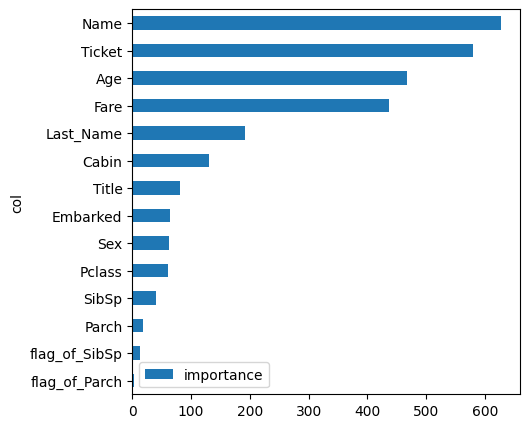

所要時間:  91.62879681587219


In [188]:
# データの分割
x_tr, x_va, y_tr, y_va = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# LightGBM用のデータセットの作成
lgb_train = lgb_op.Dataset(x_tr, label=y_tr)
lgb_test = lgb_op.Dataset(x_va, label=y_va)

# パラメーターの設定
params = {
  'objective':'binary',
  'metric': 'binary_error',
  'force_row_wise' : True,
  'verbose': -1
}

st_time = time.time()

# チューニングの開始
base_tuner = lgb_op.LightGBMTunerCV(params, lgb_train, num_boost_round=700, optuna_seed=123)
base_tuner.run()

print("Best_Score: ", {base_tuner.best_score})
print("Best_Params: ", base_tuner.best_params)

# ベストパラメーターを変数に格納
best_params = base_tuner.best_params

# ベストパラメーターでLightGBMのモデルを作成&学習
best_model = lgb.LGBMClassifier(**best_params)
best_model.fit(x_tr, y_tr)

# モデルの評価
y_va_pred = best_model.predict(x_va)
print("Accuracy: ", accuracy_score(y_va, y_va_pred))

# 予測データの推論
y_test_pred = best_model.predict(x_test)

submit_df = pd.DataFrame({
    "PassengerId" : id_test["PassengerId"],
    "Survived" : y_test_pred
})

display(submit_df.head(10))

# submit_df.to_csv("fill_na_LightGBM.csv", index=False)
# Kaggle : 0.76555

# 特徴量の重要度を確認
imp = pd.DataFrame({
    "col" : x_train.columns,
    "importance" : best_model.feature_importances_
})

imp = imp.set_index(imp["col"])
imp.sort_values(by="importance", ascending=True).plot(kind="barh", figsize=(5, 5))
plt.show()
ed_time = time.time()
print("所要時間: ", ed_time - st_time)


# 10. 欠損値補間データでRandomForest(Kaggle : 0.77511)

In [190]:
# 欠損値補間したデータの読み込み
merged_df = pd.read_csv(r"C:\Users\USER\Desktop\Kaggle\Titanic\venv\fill_na_merged_df.csv")
# LabelEncoding
for col in merged_df.columns:
    le = LabelEncoder()
    if merged_df[col].dtype == "object":
        merged_df[col] = le.fit_transform(merged_df[col])

print(merged_df.shape)

# 再度train_df, test_dfに分割
train_df = merged_df[merged_df["train"] == 1].copy()
test_df = merged_df[merged_df["train"] == 0].copy()
print(train_df.shape, test_df.shape)

# # 学習データ
x_train = train_df.drop(columns=["PassengerId", "Survived", "train"])
y_train = train_df["Survived"]
id_train = train_df[["PassengerId"]]
print("Train_data")
print(train_df.shape, x_train.shape, y_train.shape, id_train.shape)
# テストデータ
x_test = test_df.drop(columns=["PassengerId", "Survived", "train"])
id_test = test_df[["PassengerId"]]
print("Test_df")
print(test_df.shape, x_test.shape, id_test.shape)

(1308, 17)
(890, 17) (418, 17)
Train_data
(890, 17) (890, 14) (890,) (890, 1)
Test_df
(418, 17) (418, 14) (418, 1)


[I 2024-07-07 00:48:06,688] A new study created in memory with name: no-name-85a5684b-72c8-41a8-9ab6-79409f7280bc
[I 2024-07-07 00:48:07,437] Trial 0 finished with value: 0.8269662921348315 and parameters: {'n_estimators': 54, 'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.8269662921348315.
[I 2024-07-07 00:48:08,225] Trial 1 finished with value: 0.8258426966292134 and parameters: {'n_estimators': 51, 'max_depth': 16, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.8269662921348315.
[I 2024-07-07 00:48:09,058] Trial 2 finished with value: 0.8224719101123595 and parameters: {'n_estimators': 67, 'max_depth': 13, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.8269662921348315.
[I 2024-07-07 00:48:10,760] Trial 3 finished with value: 0.8247191011235955 and parameters: {'n_estimators': 142, 'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 0 with value: 0

★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★
Best Score: 0.8325842696629214
Best RF params: {'n_estimators': 61, 'max_depth': 6, 'min_samples_split': 3, 'min_samples_leaf': 4}
TR Accuracy:  0.827247191011236
VA Accuracy:  0.8426966292134831


,PassengerId,Survived
890,892,0
891,893,0
892,894,0
893,895,0
894,896,1
...,...,...
1303,1305,0
1304,1306,1
1305,1307,0
1306,1308,0


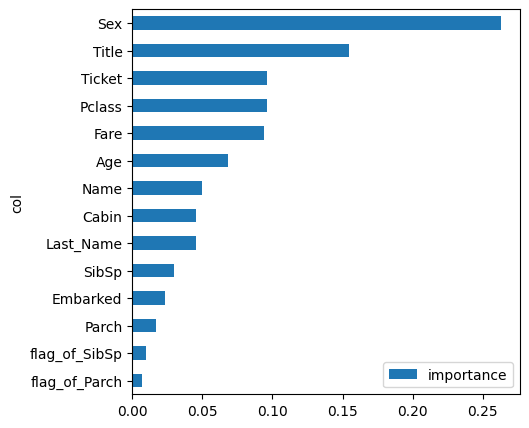

In [191]:
# ハイパーパラメータチューニングのためのOptunaの設定
def objective_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'random_state': 42
    }
    clf = RandomForestClassifier(**params)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    return cross_val_score(clf, x_train, y_train, cv=cv, scoring='accuracy').mean()

study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=100)
best_params_rf = study_rf.best_params
print("★"*89)
print(f"Best Score: {study_rf.best_value}")
print(f'Best RF params: {best_params_rf}')


# ベストパラメーターでインスタンスの作成
model_rf_best_param = RandomForestClassifier(**best_params_rf)

# データの分割
x_tr, x_va, y_tr, y_va = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# クロスバリデーションの設定
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 学習
y_tr_pred = cross_val_predict(model_rf_best_param, x_tr, y_tr, cv=cv)

# 学習データの精度評価
print("TR Accuracy: ", accuracy_score(y_tr, y_tr_pred))

# クロスバリデーションとは別に再学習
model_rf_best_param.fit(x_tr, y_tr)

# 検証データに対する予測
y_va_pred = model_rf_best_param.predict(x_va)

# 検証データの精度評価
print("VA Accuracy: ", accuracy_score(y_va, y_va_pred))

# 特徴量の重要度を確認
imp_rf = pd.DataFrame({
    "col" : x_train.columns,
    "importance" : model_rf_best_param.feature_importances_
})

imp_rf = imp_rf.set_index(imp_rf["col"])
imp_rf.sort_values(by="importance", ascending=True).plot(kind="barh", figsize=(5, 5))

# テストデータに対する予測
y_test_pred = model_rf_best_param.predict(x_test)
rf_tunig_param_result_df = pd.DataFrame({
    "PassengerId" : id_test["PassengerId"],
    "Survived" : y_test_pred
})

display(rf_tunig_param_result_df)
# rf_tunig_param_result_df.to_csv("fill_na_rf.csv", index=False)
# Kaggle : 0.77511　(欠損値補間前のデータとスコア変わらず)

# 8. Logistic Regression CV

## 使用するデータセット

In [ ]:
# 各種データの読み込み
train_df = pd.read_csv(r"C:\Users\USER\Desktop\Kaggle\Titanic\train.csv")
test_df = pd.read_csv(r"C:\Users\USER\Desktop\Kaggle\Titanic\test.csv")
# それぞれ表示して確認
# display(train_df.head())
# display(test_df.head())

# train/testデータ間でName列やTicket列の値で一致しないものが多数あり、LabelEncodingがうまくいかないので、一度データを結合してからtrain/testに分ける
# train_df/test_dfを区別するための特徴量作成
train_df["train"] = 1
test_df["train"] = 0
test_df["Survived"] = 0

# train_dfとtest_dfを結合
merged_df = pd.concat([train_df, test_df], axis=0)

# LabelEncoding
for col in merged_df.columns:
    le = LabelEncoder()
    if merged_df[col].dtype == "object":
        merged_df[col] = le.fit_transform(merged_df[col])

# 再度train_df, test_dfに分割
train_df = merged_df[merged_df["train"] == 1].copy()
test_df = merged_df[merged_df["train"] == 0].copy()


# # 学習データ
x_train = train_df.drop(columns=["PassengerId", "Survived", "train"])
y_train = train_df["Survived"]
id_train = train_df[["PassengerId"]]
print("Train_data")
print(train_df.shape, x_train.shape, y_train.shape, id_train.shape)
# テストデータ
x_test = test_df.drop(columns=["PassengerId", "Survived", "train"])
id_test = test_df[["PassengerId"]]
print("Test_df")
print(test_df.shape, x_test.shape, id_test.shape)

Train_data
(891, 13) (891, 10) (891,) (891, 1)
Test_df
(418, 13) (418, 10) (418, 1)


## 分析コード

In [ ]:
#### 欠損値を含んでいると分析出来ないので、次回は欠損値補間＆特徴量作成の上、更にモデルで分析進めて行く




# モデルのインスタンスを作成
model_lr = LogisticRegressionCV(random_state=42, cv=5)

# データの分割
x_tr, x_va, y_tr, y_va = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# モデル学習
model_lr.fit(x_tr, y_tr)

y_tr_pred = model_lr.score(x_tr, y_tr)

y_tr_pred


ValueError: Input X contains NaN.
LogisticRegressionCV does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values